# ASL Gesture Detection using OpenCV 
## This system detects some basic ASL gestures using OpenCV & Mediapipe.

### Initial Imports

In [1]:
import mediapipe as mp
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# Holistic detetction API (Hands, Face and Pose)
mp_holistic = mp.solutions.holistic

# Drawing Utilities for keypoint and landmark detection
mp_drawings = mp.solutions.drawing_utils

#### Camera openCV detects the colors as BGR so have to convert to RGB for mediapipe for detect

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

#### MediaPipe offers drawing utilities to change color, thickness and radius of landmarks and keypoints.

In [4]:
def draw_landmarks(image, results):
    # Face Landmarks
    mp_drawings.draw_landmarks(image, 
                               results.face_landmarks, 
                               mp_holistic.FACEMESH_TESSELATION, 
                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 
                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))
    # Pose Landmarks
    mp_drawings.draw_landmarks(image, 
                               results.pose_landmarks, 
                               mp_holistic.POSE_CONNECTIONS, 
                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 
                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))
    # Left Hand Landmarks
    mp_drawings.draw_landmarks(image, 
                               results.left_hand_landmarks, 
                               mp_holistic.HAND_CONNECTIONS, 
                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 
                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))
    # Right Hand 
    mp_drawings.draw_landmarks(image, 
                               results.right_hand_landmarks, 
                               mp_holistic.HAND_CONNECTIONS, 
                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 
                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))

## Testing Camera and MediaPipe Detection

In [5]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        draw_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## Keypoint Extraction
Mediapipe returns results with X, Y, Z axis values. X & Y being offsets on 2D Plane and Z being distance from the camera.<br>
All keypoints of face, hands and pose are concatenated to a single array. 

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

## Creating Dataset

#### Initiating Variables

In [7]:
# Path to save keypoints Array
DATA_PATH = os.path.join('Keypoints_DATA')

# Actions to be detected
actions = np.array(['Hello', 'ThankYou'])

# actions are used to store and make directories hence cant have space
words = np.array(['Hello', 'Thank You'])

# no of videos for a single action
no_sequence = 30

# frames for a single action
sequence_length = 30 

#### Making Directories to store keypoint arrays for dataset

In [ ]:
# for action in actions:
#     for sequence in range(no_sequence):
#         try:
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

#### Detecting and storing keypoints to directories

In [ ]:
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
#     for action in actions:
#         for sequence in range(no_sequence):
#             for frame_num in range(sequence_length):
#                 ret, frame = cap.read()

#                 image, results = mediapipe_detection(frame, holistic)
#                 # print(results)
#                 draw_landmarks(image, results)

#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     cv2.imshow('OpenCV Feed', image)
                
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                
#     cap.release()
#     cv2.destroyAllWindows()   

In [ ]:
    cap.release()
    cv2.destroyAllWindows()   

## Data Preprocessing and Model Generation

#### Imports for train test split and categorise data

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
# Numbers are assigned to each action
label_map = {label: num for num, label in enumerate(actions)}
label_map

{'Hello': 0, 'ThankYou': 1}

In [10]:
# Saved numpy keypoint arrays are loaded into arrays
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:
X = np.array(sequences)

In [12]:
y = to_categorical(labels).astype(int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

#### Model Imports

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [15]:
# logs to check model train progress on tensor board
## Open terminal in Logs folder and type: tensorboard --logdir=. 

log_dir = os.path.join('Logs_Gestures')
tb_callbacks = TensorBoard(log_dir=log_dir)

#### Training Model

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

#### Fitting Model with train data

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callbacks])

#### Testing the model

In [19]:
res = model.predict(X_test)
if actions[np.argmax(res[0])] == actions[np.argmax(y_test[0])]:
    print('Correct Prediction')
else:
    print('Incorrect Prediction')

Correct Prediction


#### Saving Model Weights
Model weights are saved to a file so that model does not need to be trained everytime.

In [ ]:
model.save('ASL_Gestures.h5')

In [ ]:
del model

In [ ]:
# model is loaded using this method
model.load_weights('ASL_Gestures.h5')

## Multilevel Confusion Matrix and Prediction Accuracy Score

#### Imports

In [20]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [21]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

##### Confusion Matrix

In [22]:
import pandas as pd
import seaborn as sns

In [25]:
confusion_matrix = multilabel_confusion_matrix(ytrue, yhat)
confusion_matrix

array([[[2, 0],
        [0, 1]],

       [[1, 0],
        [0, 2]]], dtype=int64)

In [32]:
def generate_heatmap(confusion_matrix, axes, class_label, class_names):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the action - " + class_label)

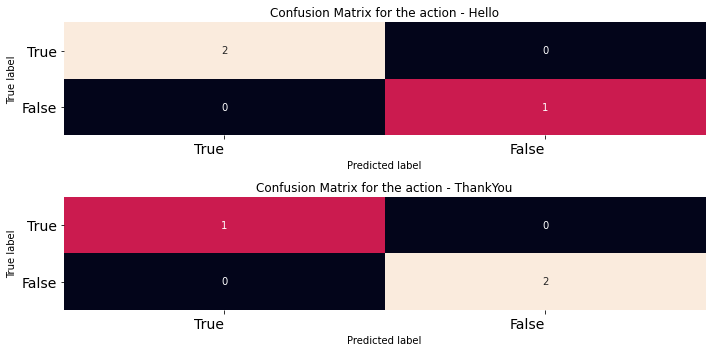

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
for axes, cfs_matrix, label in zip(ax.flatten(), confusion_matrix, actions):
        generate_heatmap(cfs_matrix, axes, label, ["True", "False"])
fig.tight_layout()
plt.show()

##### Accuracy Score

In [34]:
accuracy_score(ytrue, yhat)

1.0

## Real Time Prediction Testing

In [35]:
import pyttsx3 as px

In [36]:
# text-to-speech initiation
engine = px.init()

In [38]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            engine.say(words[np.argmax(res)])
                            engine.runAndWait()
                    else:
                        sentence.append(actions[np.argmax(res)])
                        engine.say(words[np.argmax(res)])
                        engine.runAndWait()

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()